# ECE 2200 - Chapter 2 notebook
Copyright (C) 2022 Daniel Van Blerkom

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Important Constants

Boltzmann constant $k=1.38x10^{-23}$ J/K <br>
Electron charge $q=1.6x10^{-19}$ C <br>
Dielectric constant of vacuum $\epsilon_{0}=8.85x10^{-14}$ $F/cm^2$

Silicon Characteristics

Silicon energy bandgap $E_g=1.12$ eV <br>
Electron mobility in silicon $\mu_n=1350$ $cm^2/(V*s)$ <br>
Hole mobility in silicon $\mu_p=480$ $cm^2/(V*s)$ <br>
Electron diffusion constant in silicon $D_n=34$ $cm^2/s$ <br>
Hole diffusion constant in silicon $D_p=12$ $cm^2/s$ <br>


Dielectric constant in silicon $\epsilon_{Si}=11.7 \epsilon_{0}$ $F/cm^2$

In [2]:
q = 1.6E-19 #C, or J/eV
k = 1.38E-23 #J/K
eps_0 = 8.85E-14 #F/cm

Eg = 1.12*q #in J
mu_n = 1350 #cm^2/(V s)
mu_p = 480 #cm^2/(V s)
D_n = 34 #cm^2/sec
D_p = 12 #cm^2/sec

eps_si = 11.7*eps_0 #F/cm

### First, let's look at the electron carrier concentration in undoped Silicon:

Intrinsic carrier concentration in Silicon

$n_i=5.2x10^{15}T^{3/2}exp({\frac{-E_g}{2kT}}) $

In [3]:
def n_i(Temp): return 5.2E15*math.pow(Temp,(3/2))*math.exp(-Eg/(2*k*Temp))

#### Plot the carrier concentration from 250K to 350K (i.e. -23C to 77C)

In [4]:
Temps = np.arange(250.0,350.0,10.0)
niplot = np.zeros_like(Temps)
for i,Temp in enumerate(Temps):
    niplot[i] = n_i(Temp)

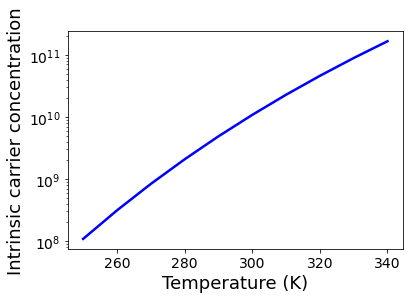

In [5]:
plt.figure()
plt.plot(Temps, niplot, color='b', linewidth=2.5)
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Intrinsic carrier concentration', fontsize=18)

ax = plt.gca()

ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


Notice the intrinsic carrier concentration varies by orders of magnitude over 100C.

### Using the mobility, we can determine the resistivity of Silicon with different free charge carrier levels

The current density for Silicon with a free electron density of $n$, under an electric field of $E$, is:

$J_n=\mu_n E \cdot{} n \cdot{} q$

Remember that $R = \frac{V}{I}$, $E = \frac{V}{L}$, and $J = \frac{I}{\sigma}$, where $\sigma$ is the cross-sectional area.

Resistivity $\rho$ is resistance times area divided by length, giving $\rho = \frac{R \cdot{} \sigma}{L} = \frac{V \cdot{} \sigma}{I \cdot{} L} $.

Substituting, we can write $\rho = \frac{E}{J_n} = \frac{1}{\mu_n \cdot{} n \cdot{} q}$


Accounting for the holes as well as the electrons:

$J=\mu_n E \cdot{} n \cdot{} q + \mu_p E \cdot{} p \cdot{} q$

Note that the current densities add - because the oppositely charged carriers move in opposite directions under the electric field; i.e. they both contribute to the total net current.  This is different than what happens with diffusion, as we will see later.

Using both holes and electron free carrier density, we can write $\rho = \frac{1}{\mu_n \cdot{} n \cdot{} q + \mu_p \cdot{} p \cdot{} q}$

However, in most doped situations either the electron or hole density will dominate the resistivity.

In [6]:
def rho_n(n): return 1/(mu_n*n*q)
def rho_p(p): return 1/(mu_p*p*q)
def rho(n,p): return 1/(mu_p*p*q + mu_n*n*q)


What's the resistivity of intrinsic silicon?  Remember $np = n_i^2$, so for intrinsic silicon $n = p = n_i$

In [7]:
rho(n_i(300),n_i(300))

316932.8613622433

It's high - pure silicon is not a good conductor at room temperature (hence the "semi-")

### Diffusion current

### The diffusion current depends on the concentration gradient of the free carriers

The diffusion current density for Silicon with a free electron density of $n$ is:

$J_n=D_n  \frac{dn}{dx} \cdot{} q$

For holes:

$J_p=-D_p  \frac{dp}{dx} \cdot{} q$

And total current:

$J=q (D_n  \frac{dn}{dx} - D_p \frac{dp}{dx} )$



___

## Answers to Homework #1

Problems 2.2, 2.3, 2.5, 2.6, 2.7

In [8]:
# Problem 2.2
# velociy = mu * E (ignoring saturation)

Efld = 0.1 / 1E-4 # V/um coverted to V/cm
velec = mu_n * Efld # in cm/s
vhole = -mu_p * Efld # in cm/s
print("Electron velocity in cm/s:",format(velec,'.2E'))
print("Hole velocity in cm/s:",format(vhole,'.2E'))

# doping for J = 1 mA/um^2
# solve for the majority carrier concentration, given J:  n = J / (mu_n E q)
# remember that the majority carrier concentration = the doping density, i.e.  n = Nd

Nd = (1E-3/(1E-4*1E-4)) / (mu_n * Efld * q) # in cm^-3
print("Doping for 1 mA/um^2 in cm^-3:",format(Nd,'.2E'))


Electron velocity in cm/s: 1.35E+06
Hole velocity in cm/s: -4.80E+05
Doping for 1 mA/um^2 in cm^-3: 4.63E+17


In [9]:
# Problem 2.3

Area = 0.05E-4*0.05E-4 # cm^2
Length = 0.1E-4 # cm
Vdrop = 1 # V
Nd = 1E17 # cm^-3
Efld = Vdrop / Length # in V/cm

Jtot = q*mu_n*Efld*Nd # in A/cm^2
Itot = Jtot * Area  # in A

print("Total current in A:", format(Itot,'.2E'))

# at 400K - intrinsic carrier density will be larger, hole density might be significant, lets include it...

Jtot = q*(mu_n*Efld*Nd + mu_p*Efld*(math.pow(n_i(400),2)/Nd))
Itot = Jtot * Area

print("Total current in A:", Itot)


Total current in A: 5.40E-05
Total current in A: 5.400000002646382e-05


In [10]:
# Problem 2.5

Area = 1E-4*1E-4 # 1um^2 converted to cm^2
dndx = -5E16/2E-4 # cm^4
dpdx = 2E16/2E-4 # cm^4
Jtot = q*(D_n * dndx - D_p * dpdx)
Itot = Jtot * Area

print("Total current for 1umx1um cross section, in A:", format(Itot,'.2E'))

Total current for 1umx1um cross section, in A: -1.55E-05


Problem 2.6

$Q_{stored} = q A \int_0^L n(x) dx = \frac{q A N L}{2}$

Problem 2.7

$Q_{stored} = q A \int_0^\infty n(x) dx = q A N \int_0^\infty e^{\frac{-x}{L_d}} dx = q A N L_d$




___

### Now let's look at the built-in potential

Built-in potential is found by equating the drift and diffusion currents so that the cancel out in equilibrium.

$V_0=\frac{kT}{q} ln(\frac{N_A N_D}{n_i^2})$

In [11]:
def V_0(Na,Nd,Temp): return (k*Temp/q)*math.log(Na*Nd/math.pow(n_i(Temp),2))

#### Plot the change in the built-in potential across different Nd doping levels (keep Na at 2x10^16)

In [12]:
Nds = np.arange(14.0,18.0,0.1)
Nds = 10**Nds
v0plot = np.zeros_like(Nds)
for i,Nd in enumerate(Nds):
    v0plot[i] = V_0(2E16,Nd,300)

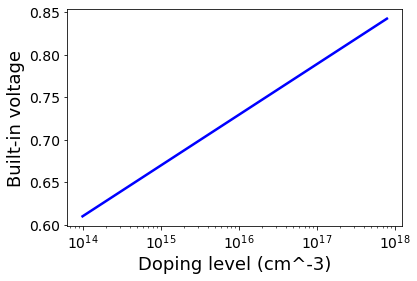

In [13]:
plt.figure()
plt.plot(Nds, v0plot, color='b', linewidth=2.5)
plt.xlabel('Doping level (cm^-3)', fontsize=18)
plt.ylabel('Built-in voltage', fontsize=18)

ax = plt.gca()
ax.set_xscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


Notice how the built-in voltage doesn't change much when the doping level changes by orders of magnitude.

In fact, the change is only 60mV per order of magnitude change at 300K, i.e. $V_t ln(10)$

In [14]:
# what's the change in voltage for an order of magnitude increase in Nd?

V_0(2E17,2E16,300) - V_0(2E16,2E16,300)


0.05957938928122086

In reverse bias, the junction capacitance changes due to the depletion region width changing.

The capacitance in equilibrium is give by:

$C_{j0} = \sqrt{\frac{\epsilon_{Si} q N_A N_D}{2 (N_A + N_D) V_0}}$

Adn the capacitance under reverse bias $V_R$ is:

$C_j = \frac{C_{j0}}{\sqrt{1-\frac{V_R}{V_0}}}$

In [15]:
def Cj_0(Na,Nd,Temp): return math.sqrt(eps_si*q*Na*Nd/(2*(Na+Nd)*V_0(Na,Nd,Temp)))

def Cj(Vr,Na,Nd,Temp): return Cj_0(Na,Nd,Temp)/math.sqrt(1.0-(Vr/V_0(Na,Nd,Temp)))

In [16]:
# equilibrium junction capacitance for Na=2E16 Nd=1E16 junction at 300C

Cj_0(2E16,1E16,300)

2.7522905513128887e-08

In [17]:
# junction capacitance at -1V (reverse bias) for Na=2E16 Nd=1E16 junction at 300C

Cj(-1.0,2E16,1E16,300)

1.7871621229971028e-08

In [18]:
Vrs = np.arange(-3.0,0.0,0.1)
cjplot = np.zeros_like(Vrs)
for i,vr in enumerate(Vrs):
    cjplot[i] = Cj(vr,2E16,9E15,300)

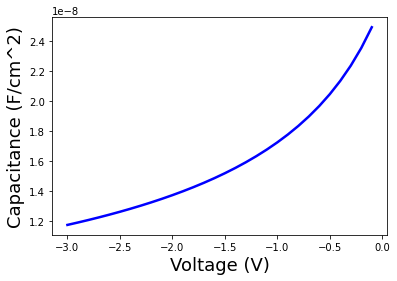

In [19]:
plt.figure()
plt.plot(Vrs, cjplot, color='b', linewidth=2.5)
plt.xlabel('Voltage (V)', fontsize=18)
plt.ylabel('Capacitance (F/cm^2)', fontsize=18)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


That capacitance decreases with more negative reverse bias across the diode, as the depletion region gets wider.


## Diode junction equation

$I_D = I_S ( exp(\frac{V_D}{V_T}) - 1 )$

$I_S = A q n_i^2 (\frac{D_n}{N_A L_n} + \frac{D_p}{N_D L_p})$

where $V_T = \frac{kT}{q}$ and is approximately 25mV at 300K (room temperature), and $L_n$ and $L_p$ are the diffusion lengths for electrons and holes.

In practice, the value of $I_S$ is given for a particular diode.

In [20]:
def I_D(Is,Vd,Temp): return Is*(math.exp(((Vd*q)/(k*Temp)))-1.0)

def V_T(Temp): return k*Temp/q

In [21]:
Vds = np.arange(-3.0,0.8,0.05)
idplot = np.zeros_like(Vds)
for i,vd in enumerate(Vds):
    idplot[i] = I_D(1E-14,vd,300)

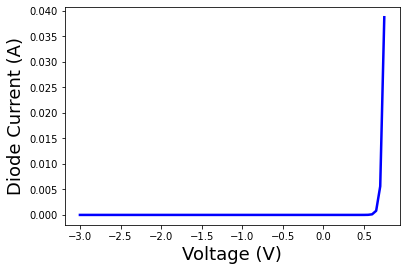

In [22]:
plt.figure()
plt.plot(Vds, idplot, color='b', linewidth=2.5)
plt.xlabel('Voltage (V)', fontsize=18)
plt.ylabel('Diode Current (A)', fontsize=18)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


As the diode goes into forward bias, the current increases exponentially.

Below we plot the absolute value on a log scale to see both the reverse and forward currents.

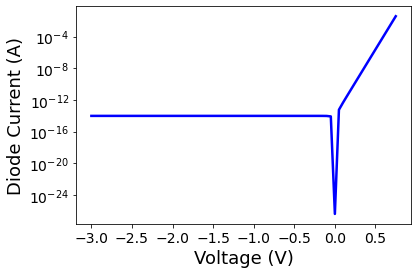

In [23]:
plt.figure()
plt.plot(Vds, abs(idplot), color='b', linewidth=2.5)
plt.xlabel('Voltage (V)', fontsize=18)
plt.ylabel('Diode Current (A)', fontsize=18)

ax = plt.gca()

ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


___

## Homework #2

2.10, 2.11, 2.12, 2.13, 2.16, 2.17, 2.22, 2.23, 2.24, 2.30

### Problem 2.10

In [24]:
# Problem 2.10a

# Junction capacitance F/cm^2 for Nd=3E16 cm^-3 and Na=2E15 cm^-3 at -1.6V

print("Junction capacitance F/cm^2:",format(Cj(-1.6,3E16,2E15,300),'.2E'))

Junction capacitance F/cm^2: 8.22E-09


Problem 2.10b  

Solve for new value of Na that will double Cj0.

$\sqrt{\frac{\epsilon_{Si} q N'_A N_D}{2 (N'_A + N_D) V_0}} = 2 \sqrt{\frac{\epsilon_{Si} q N_A N_D}{2 (N_A + N_D) V_0}}$

$\sqrt{\frac{N'_A}{(N'_A + N_D)}} = 2 \sqrt{\frac{N_A}{(N_A + N_D)}}$

$(N'_A)(N_A + N_D) = 4 (N_A)(N'_A + N_D)$

$ N'_A = \frac{4 N_A N_D}{N_D - 3 N_A} $



In [25]:
Na_new = (4 * 2E15 * 3E16)/(3E16 - 3*2E15)

print("New Na doping required to double Cj0 in cm^-3:",format(Na_new,'.2E'))

print("Factor increase in Na:",Na_new/2E15)

New Na doping required to double Cj0 in cm^-3: 1.00E+16
Factor increase in Na: 5.0


This is the solution given by the book.  But note, this problem is not written very well.  If we want to double the junction capacitance at 1.6V reverse bias, we need to include the effect of the change in the built-in potential, not just Cj0.  This would make the solution much more difficult, since it would include the exponential term the defines the built-in potential.

Is the junction capacitance actually doubled at -1.6V with this new value for Na?

In [26]:
print("Junction capacitance with new Na F/cm^2:",format(Cj(-1.6,3E16,1E16,300),'.2E'))
print("Ratio:",Cj(-1.6,3E16,1E16,300)/Cj(-1.6,3E16,2E15,300))

Junction capacitance with new Na F/cm^2: 1.63E-08
Ratio: 1.9821196858593981


So it is not exactly doubled, due to the change in the built-in potential.  Razavi gets a C on this problem...

### Problem 2.11

Undoped side of junction will have intrinsic carrier density n_i for both electrons & holes

For clarity, let's use the version of the built-in potential equation that has the ratio of carrier densities:

$V_0=\frac{kT}{q} ln(\frac{n_n}{n_p})$

$n_n$ is simply $N_D$, since it is the majority carrier.

$n_p$ is $n_i$, since this is the side that is un-doped, i.e. intrinsic.

So, we get:

$V_0=\frac{kT}{q} ln(\frac{N_D}{n_i})$


In [27]:
V0_undoped = (k*300/q)*math.log(3E16/n_i(300))

print("Built-in potential with one side undoped in V:",format(V0_undoped,'.2E'))


Built-in potential with one side undoped in V: 3.84E-01


### Problem 2.12

In [28]:
# Probelm 2.12

print("Majority concentration on n side cm^-3:",format(5E17,'.2E'))
print("Minority concentration on n side cm^-3:",format(math.pow(n_i(300),2)/5E17,'.2E'))
print("Majority concentration on p side cm^-3:",format(4E16,'.2E'))
print("Minority concentration on p side cm^-3:",format(math.pow(n_i(300),2)/4E16,'.2E'))

print("Built in potential for 250K in V:",format(V_0(4E16,5E17,250),'.2E'))
print("Built in potential for 300K in V:",format(V_0(4E16,5E17,300),'.2E'))
print("Built in potential for 350K in V:",format(V_0(4E16,5E17,350),'.2E'))


Majority concentration on n side cm^-3: 5.00E+17
Minority concentration on n side cm^-3: 2.32E+02
Majority concentration on p side cm^-3: 4.00E+16
Minority concentration on p side cm^-3: 2.90E+03
Built in potential for 250K in V: 9.05E-01
Built in potential for 300K in V: 8.48E-01
Built in potential for 350K in V: 7.89E-01


The built-in potential decreases with temperature, because the intrinsic carrier concentration is increasing with temperature.

### Problem 2.13

First we can solve for V_0, by cancelling out Cj0 by dividing the two data points for the junction capaciance:

$C_{ja} = \frac{C_{j0}}{\sqrt{1-\frac{-0.5V}{V_0}}} = 2.2 fF/um^2$

$C_{jb} = \frac{C_{j0}}{\sqrt{1-\frac{-1.5V}{V_0}}} = 1.3 fF/um^2$

$\frac{C_{ja}}{C_{jb}} = \frac{\sqrt{1-\frac{-1.5V}{V_0}}}{\sqrt{1-\frac{-0.5V}{V_0}}} = \frac{2.2}{1.3} $

$V_0 + 1.5 = {(\frac{2.2}{1.3})}^2 (V_0 + 0.5)$

In [29]:
V0solve = (math.pow(2.2/1.3,2)*0.5 - 1.5)/(1.0 - math.pow(2.2/1.3,2))

print("Built in potential in V:", format(V0solve,'.2E'))

Built in potential in V: 3.65E-02


(As we will see, this problem is broken!  0.0365V is way too small for a built-in potential for any reasonable amount of dopant.)

Now solve for $C_{j0}$ by plugging in one of the given points:

$C_{j0} = C_j \sqrt{1-\frac{V_R}{V_0}}$

$C_{j0} = 2.2 \sqrt{1-\frac{-0.5 V}{V_0}}$


In [30]:
Cj0solve = 2.2*math.sqrt(1+(0.5/V0solve))

print("Cj0 in fF/um^2:", format(Cj0solve,'.2E'))

Cj0solve2 = Cj0solve * 1E-15 * 1E4 * 1E4 

print("Cj0 in F/cm^2:", format(Cj0solve2,'.2E'))


Cj0 in fF/um^2: 8.43E+00
Cj0 in F/cm^2: 8.43E-07


There is not a single solution for Na and Nd; given a value of Nd, we can try to find the value for Na (or vice-versa).

First we re-arrange the equation for $C_{j0}$:

$2 V_0 C_{j0}^2 (N_A + N_D) = \epsilon_{Si} q N_A N_D$

$\frac{N_A N_D}{N_A + N_D} = \frac{2 V_0 C_{j0}^2}{\epsilon_{Si} q}$

Solving for Na:

$N_A = \frac{2 V_0 C_{j0}^2 N_D}{ \epsilon_{Si} q N_D - 2 V_0 C_{j0}^2}$



Let's try with Nd = 2E18 cm^3

In [31]:
Na_solve = (2*V0solve*math.pow(Cj0solve2,2)*2E18)/(eps_si*q*2E18 - 2*V0solve*math.pow(Cj0solve2,2))

print("Na given Nd=2E18 cm^-3 in cm^-3:", format(Na_solve,'.2E'))

Na given Nd=2E18 cm^-3 in cm^-3: 3.72E+17


#### BUT!!  what is the built-in potential in this case?


In [32]:
print("Built-in potential from solution in V:",format(V_0(2E18,3.72E17,300),'.2E'))

Built-in potential from solution in V: 9.42E-01


Our combination of Na and Nd gives a very different built-in potential than that solved for above.  So this is not a solution - in fact, this problem does not have a solution, the values of Na and Nd need to be < n_i which violates our basic assumptions.  

Razavi gets an F for this problem...

### Problem 2.16

Solve $I_S = I_D exp(-V_D/V_T)$

In [33]:
# Problem 2.16a

Is_solve = 0.001*math.exp(-1.0*0.75/V_T(300))

print("Is value (A):", format(Is_solve,'.2E'))

Is value (A): 2.58E-16


In [34]:
# Problem 2.16b

# Doubling the area results in Is doubling; so we need to solve for V_D using twice the Is solved above

Vd_solve = V_T(300)*math.log(0.001/(2*Is_solve))

print("Vd value for twice the area (V):", format(Vd_solve,'.2E'))

Vd value for twice the area (V): 7.32E-01


### Problem 2.17

$V_B = V_{D1} + V_{D2}$

$V_B = V_T ( ln(\frac{I_B}{I_{S1}}) + ln(\frac{I_B}{I_{S2}}) ) = V_T ( ln(\frac{I_B^2}{I_{S1} I_{S2}})$



Rearranging to solve for $I_B$:

$I_B = \sqrt{I_{S1} I_{S2}} exp(\frac{V_B}{2V_T})$

Plugging the above into $V_{D1} = V_T ln(I_B / I_{S1})$ gives:

$V_{D1} = V_T ln( \sqrt{\frac{I_{S2}}{I_{S1}}} ) + V_B / 2$

$V_{D2} = V_T ln( \sqrt{\frac{I_{S1}}{I_{S2}}} ) + V_B / 2$


### Problem 2.22

Setting the current through the resistor equal to the current through the diode

$V_{R1}/R_1 = I_S (exp (V_{D1}/V_T) - 1)$

and $V_{R1} = V_{D1} = V_X / 2$

gives $\frac{V_X}{2 R_1} = I_S (exp (V_{X}/(2 V_T)) - 1)$

We can't solve this directly, but we can iterate to find the solution.

First we write the value on the left half of the equation as

$i_R(V_X) = \frac{V_X}{2 R_1}$

replacing this function on the left side of the equation, we then solve for $V_X$, giving:

$V_X = 2 V_T ln (\frac{i_R(V_X)}{I_S} + 1)$

Then we interate by using step 1 and 2 below:

1. We solve for $i_R(V_X)$ given a value for Vx from step 2 (or a guess to start).

2. Then we will solve for Vx from the right half of the equation, using the value of the left half solved in step 1.

We will continue to iterate until the Vx values converge to the answer.

In [35]:
def Ix1(Vx): return (Vx/2)/2000
def Vx2(Ix): return 2*(V_T(300))*math.log((Ix/2E-16)+1)

First we will guess Vx=2V

In [36]:
Ix1(2)

0.0005

In [37]:
Vx2(Ix1(2))

1.4773233881238108

In [38]:
Ix1(Vx2(Ix1(2)))

0.0003693308470309527

In [39]:
Vx2(Ix1(Vx2(Ix1(2))))

1.4616475238498239

In [40]:
Ix1(Vx2(Ix1(Vx2(Ix1(2)))))

0.000365411880962456

In [41]:
Vx2(Ix1(Vx2(Ix1(Vx2(Ix1(2))))))

1.4610954709758357

After three iterations, the value has converged to $V_X = 1.46V$

#### Here's another way to solve this problem, using graphing...

We will simply plot the left-hand of the equation and the right hand of the equation, and find when they are equal to each other.


In [42]:
def Id1(Vx): return 2E-16*(math.exp(Vx/(2*V_T(300)))-1)

In [43]:
Vxs = np.arange(1.2,1.6,0.05)
ixplot = np.zeros_like(Vxs)
idplot = np.zeros_like(Vxs)
for i,vx in enumerate(Vxs):
    ixplot[i] = Ix1(vx)
    idplot[i] = Id1(vx)

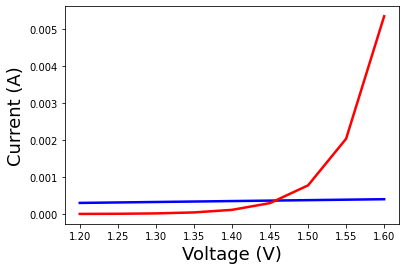

In [44]:
plt.figure()
plt.plot(Vxs, ixplot, color='b', linewidth=2.5)
plt.plot(Vxs, idplot, color='r', linewidth=2.5)
plt.xlabel('Voltage (V)', fontsize=18)
plt.ylabel('Current (A)', fontsize=18)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

The crossing point is around 1.46V

### Problem 2.23

Note that $V_D = V_X - R_1 I_X$

So we can write, for the two data points given

$V_{X1}-R_1 I_{X1} = V_T ln( I_{X1} / I_S )$

$V_{X2}-R_1 I_{X2} = V_T ln( I_{X2} / I_S )$

Subtracting these two equation and using the law of logarithms, we get

$V_{X1}-V_{X2}-R_1 (I_{X1}-I_{X2}) = V_T ln ( I_{X1} / I_{X2} ) $

or

$R_1 = \frac{V_{X1}-V_{X2}-V_T ln ( I_{X1} / I_{X2} ) }{I_{X1}-I_{X2}}$


In [45]:
R1_solve = (1.0 - 2.0 - V_T(300)*math.log(0.2E-3/0.5E-3))/(0.2E-3 - 0.5E-3)

print("Resistor value (ohms):", format(R1_solve,'.2E'))

Resistor value (ohms): 3.25E+03


now plug this resistor value into 

$I_S = I_{X1} exp( -(V_{X1}-R_1 I_{X1})/V_T)$

In [46]:
Is_solve = 0.2E-3*math.exp((R1_solve*0.2E-3 - 1.0)/V_T(300))

print("Is value (in A):", format(Is_solve,'.2E'))

Is value (in A): 2.76E-10


### Problem 2.24

The total current is the sum of the two currents:

$I_X = I_R + I_D = I_R + I_S exp( I_R R_1 / V_T )$

or

$I_X - I_R = I_S exp( I_R R_1 / V_T )$

We are stuck with an equation we can't solve directly, but we can use iteration again.



In [47]:
def Id1(Ir,Ix): return (Ix - Ir)
def Ir2(Id1): return V_T(300)*math.log(Id1/3E-16)/1000

In [48]:
Ir2(Id1(0.5E-3,1E-3))

0.0007281702843895963

In [49]:
Ir2(Id1(0.728E-3,1E-3))

0.000712417428308331

In [50]:
Ir2(Id1(0.712E-3,1E-3))

0.0007138964022664397

In [51]:
Ir2(Id1(0.7139E-3,1E-3))

0.0007137251335693727

In [52]:
print("VD1 for 1mA :",1000*Ir2(Id1(0.7137E-3,1E-3)))

VD1 for 1mA : 0.7137432153311148


In [53]:
Ir2(Id1(0.7137E-3,2E-3))

0.0007526200133342379

In [54]:
Ir2(Id1(0.7526E-3,2E-3))

0.0007518254310263032

In [55]:
print("VD1 for 2mA :",1000*Ir2(Id1(0.7518E-3,2E-3)))

VD1 for 2mA : 0.7518420202238582


In [56]:
Ir2(Id1(0.7518E-3,4E-3))

0.0007765888309777076

In [57]:
Ir2(Id1(0.7766E-3,4E-3))

0.0007763905173794651

In [58]:
print("VD1 for 4mA :",1000*Ir2(Id1(0.7764E-3,4E-3)))

VD1 for 4mA : 0.776392122777325
